<a href="https://colab.research.google.com/github/DhruvBarthwal/LangGraph/blob/main/LangGraph6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conditional Graph 2**

In [19]:
from typing import TypedDict
from langgraph.graph import StateGraph , START, END

In [20]:
class AgentState(TypedDict):
  number1 : int
  number2 : int
  number3 : int
  number4 : int
  operation1 : str
  operation2 : str
  finalNumber1 : int
  finalNumber2 : int

In [21]:
def adder1(state : AgentState) -> AgentState:
  """This node add two numbers"""
  state['finalNumber1'] = state['number1'] + state['number2']
  return state

def subtractor1(state : AgentState) -> AgentState:
  """This node subtracts two numbers"""
  state['finalNumber1'] = state['number1'] - state['number2']
  return state

def deciding_node1(state: AgentState) -> AgentState:
  """This node decides which operation to perform"""
  if(state['operation1'] == "+"):
    return 'addition_operation1'
  elif state['operation1'] == '-':
    return 'subtraction_operation1'

In [22]:
def adder2(state : AgentState) -> AgentState:
  """This node add two numbers"""
  state['finalNumber2'] = state['number3'] + state['number4']
  return state

def subtractor2(state : AgentState) -> AgentState:
  """This node subtracts two numbers"""
  state['finalNumber2'] = state['number3'] - state['number4']
  return state

def deciding_node2(state: AgentState) -> AgentState:
  """This node decides which operation to perform"""
  if(state['operation2'] == "+"):
    return 'addition_operation2'
  elif state['operation2'] == '-':
    return 'subtraction_operation2'

In [23]:
graph = StateGraph(AgentState)
graph.add_node('add_node1',adder1)
graph.add_node('subtract_node1',subtractor1)
graph.add_node('router1', lambda state : state)
graph.add_node('router2', lambda state : state)
graph.add_edge(START,'router1')
graph.add_conditional_edges(
    'router1',
    deciding_node1,
    {
        'addition_operation1': 'add_node1',
        'subtraction_operation1': 'subtract_node1'
    }
)
graph.add_edge('add_node1','router2')
graph.add_edge('subtract_node1','router2')
graph.add_node('add_node2',adder2)
graph.add_node('subtract_node2',subtractor2)
graph.add_conditional_edges(
    'router2',
    deciding_node2,
    {
        'addition_operation2': 'add_node2',
        'subtraction_operation2': 'subtract_node2'
    }
)
graph.add_edge('add_node2',END)
graph.add_edge('subtract_node2',END)

app = graph.compile()

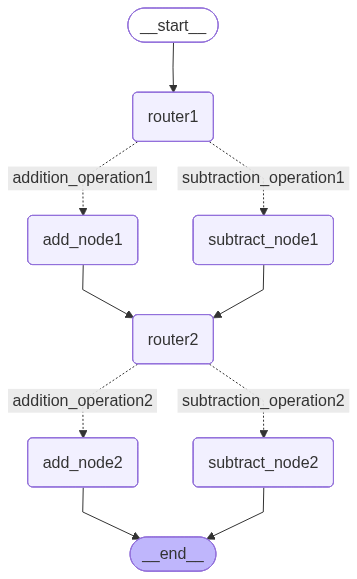

In [24]:

from IPython.display import Image , display
display(Image(app.get_graph().draw_mermaid_png()))

In [25]:
temp = AgentState(number1= 10, number2 =5,operation1='-',number3 = 7, number4 = 2, operation2 = '+',finalNumber1= 0, finalNumber2 = 0)
print(app.invoke(temp))

{'number1': 10, 'number2': 5, 'number3': 7, 'number4': 2, 'operation1': '-', 'operation2': '+', 'finalNumber1': 5, 'finalNumber2': 9}
